In [4]:
""" El objetivo es crear una red neuronal para que nos prediga una imagen 
Comprobar si funciona TensorFlow + la API keras """

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2022-10-01 21:33:02.339394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-01 21:33:02.517873: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-01 21:33:02.517899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-01 21:33:02.556825: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-01 21:33:03.353714: W tensorflow/stream_executor/platform/de

2.10.0


In [5]:
""" Vamos a llamar a otras librerias """
import numpy as np
import matplotlib.pyplot as plt

""" Vamos a utilizar una base de datos de imagenes de ropa etiquetadas MNIST
    Tiene 70.000 imagenes con una resolución de 28x28 pixeles
    Utilizaremos 60.000 imagenes para entrenamiento y otras 10.000 para la predicción """

ropa = keras.datasets.fashion_mnist

""" Crearemos una clase para cada tipo de ropa y/o etiqueta """

(train_images, train_labels), (test_images, test_labels) = ropa.load_data()
train_images.shape

(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

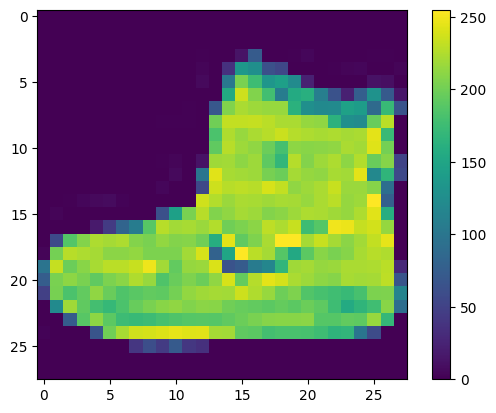

In [6]:
""" Vamos a visualizar la primera imagen. """
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [7]:
""" Una clase para tener el texto de la clasificación """
class_ropa = ["Top", "Pantalón", "Jersey", "Vestido", "Abrigo", "Sandalias", "Camisa", "Bambas", "Bolso", "Botas"]
print(class_ropa[train_labels[0]])

Botas


<function matplotlib.pyplot.show(close=None, block=None)>

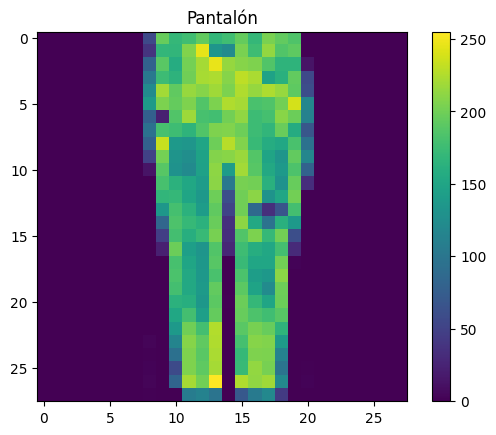

In [8]:

def identificar_ropa(ropa_index):
    plt.figure()
    plt.imshow(train_images[ropa_index])
    plt.colorbar()
    plt.grid(False)
    plt.title(class_ropa[train_labels[ropa_index]])
    return plt.show

identificar_ropa(599)

In [9]:
""" Vamos a escalar los valores antes de alimentarlos en el modelo de datos de la red neuronal """
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

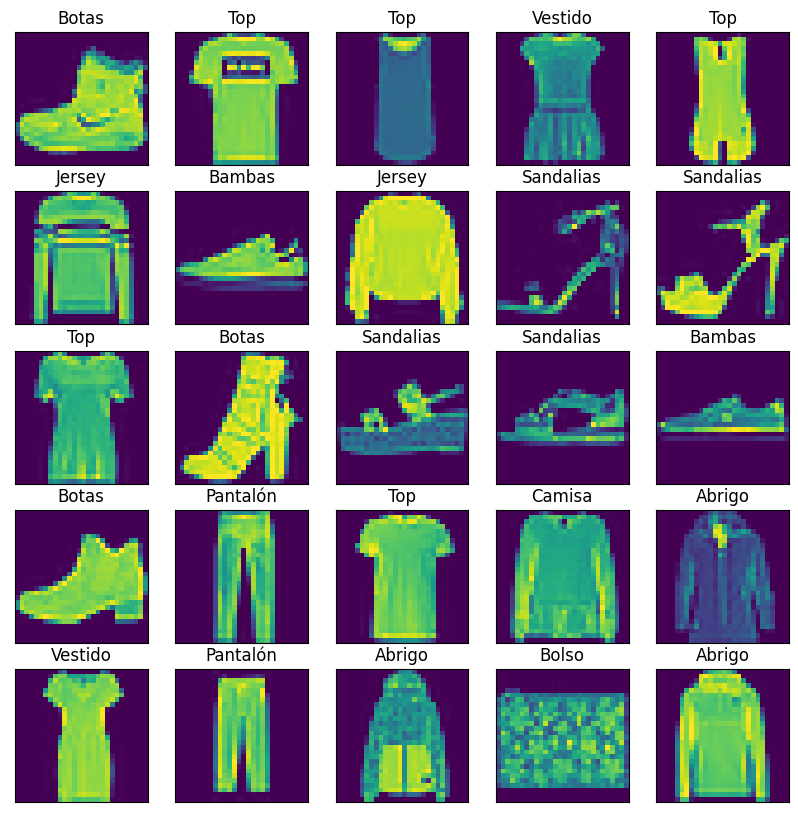

In [10]:
""" Vamos a ver las imagenes """
plt.figure(figsize=(10,10))
""" Un buble for para ver las primeras 25 imagenes"""
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title(class_ropa[train_labels[i]])
plt.show

In [11]:
""" Vamos a crear la red neuronal """
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2022-10-01 21:33:07.855040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-01 21:33:07.855107: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-01 21:33:07.855144: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hvior-HP-EliteBook-820-G4): /proc/driver/nvidia/version does not exist
2022-10-01 21:33:07.855591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
""" Construir el modelo, requiere configurar las capas y después compilar el modelo"""
modelo.compile(optimizer="adam", 
               loss="sparse_categorical_crossentropy", 
               metrics=["accuracy"]
               )

In [22]:
""" Vamos a entrenar el modelo con fit """
modelo.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1206 - accuracy: 0.9552
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1144 - accuracy: 0.9578
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1125 - accuracy: 0.9577
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1127 - accuracy: 0.9578
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1090 - accuracy: 0.9591
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.9599
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1085 - accuracy: 0.9591
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1037 - accuracy: 0.9611
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1032 - accuracy: 0.9611
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.103

In [14]:
modelo.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1766 - accuracy: 0.9335
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1715 - accuracy: 0.9351
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1686 - accuracy: 0.9366
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1646 - accuracy: 0.9377
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1596 - accuracy: 0.9394
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1564 - accuracy: 0.9406
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9428
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1515 - accuracy: 0.9431
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1488 - accuracy: 0.9437
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.144

<function matplotlib.pyplot.show(close=None, block=None)>

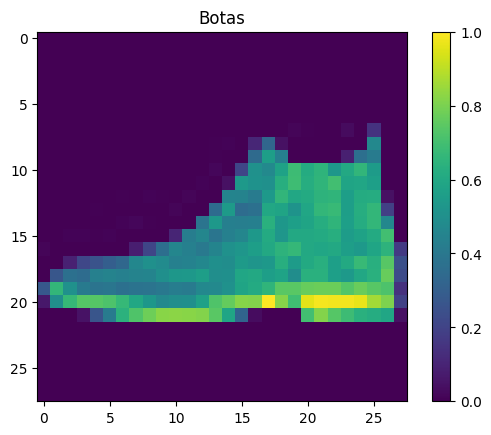

In [15]:

def identificar_ropa_test(ropa_index):
    plt.figure()
    plt.imshow(test_images[ropa_index])
    plt.colorbar()
    plt.grid(False)
    plt.title(class_ropa[test_labels[ropa_index]])
    return plt.show

identificar_ropa_test(0)

313/313 [==============================] - 1s 2ms/step
[2.6470510e-05 1.1668597e-09 2.3950455e-12 9.9997228e-01 3.8453289e-09
 2.8175812e-25 1.1240340e-06 2.7377830e-21 5.3859655e-08 1.2494981e-17]


<function matplotlib.pyplot.show(close=None, block=None)>

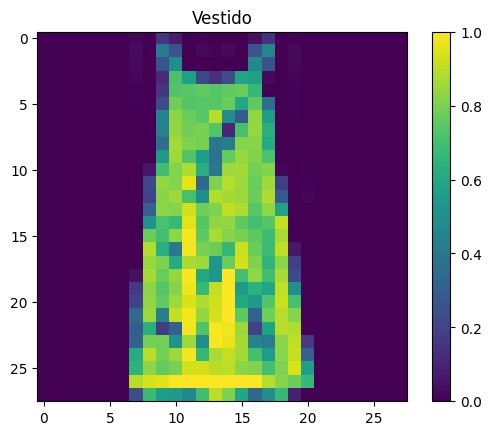

In [16]:
""" Vamos a hacer la predicción """
prediccion = modelo.predict(test_images)
print(prediccion[450])
identificar_ropa_test(450)

313/313 [==============================] - 1s 2ms/step
[2.2294392e-30 0.0000000e+00 6.4975077e-36 2.7460801e-36 0.0000000e+00
 1.7553861e-11 6.6223018e-35 9.6956690e-14 2.9925799e-34 9.9999994e-01]


<function matplotlib.pyplot.show(close=None, block=None)>

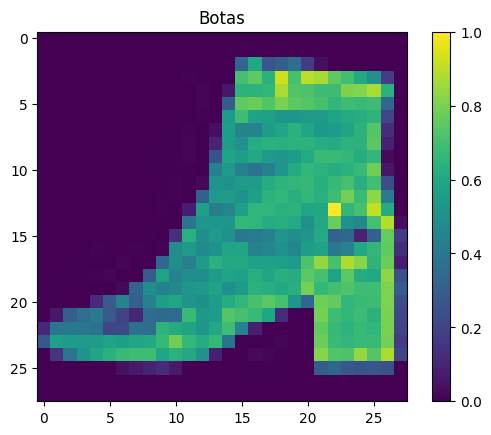

In [26]:
""" Vamos a hacer la predicción """
prediccion = modelo.predict(test_images)
print(prediccion[2050])
identificar_ropa_test(2050)

1/1 [==============================] - 0s 28ms/step


array([[9.9128985e-01, 2.9744458e-12, 8.6550312e-03, 7.0318209e-23,
        5.4113239e-05, 3.2286663e-21, 9.6637348e-07, 4.6817513e-17,
        3.2127657e-15, 1.4296749e-23]], dtype=float32)

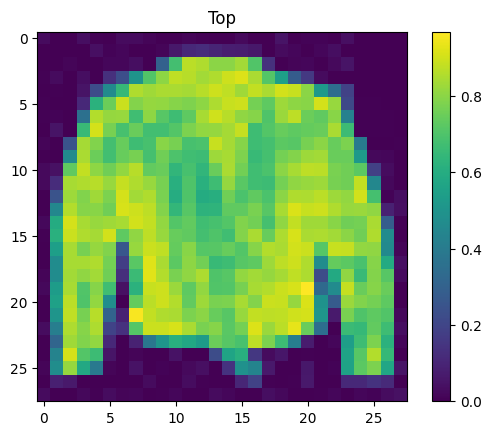

In [30]:
import numpy as np
from PIL import Image
# Abrimos la imagen en jpg y le hacemos un resize a 28 pixels
basewidth = 28
img = Image.open('chupa.jpg')
hsize = basewidth
img = img.resize((basewidth, hsize))
# Convertimos la imagen a blanco y negro
im = np.array(Image.open('resized_chupa.jpg').convert('L'))
# La transformamos en un array
data = np.asarray(im)
# Invertir los colores para que se asemeje al dataset
data = 1 - data / 255.0
plt.figure()
plt.imshow(data)
plt.colorbar()
plt.grid(False)
# Sacamos la predicción según el módelo
pred = modelo.predict(data)
class_ropa = ["Top", "Pantalón", "Jersey", "Vestido", "Abrigo", "Sandalias", "Camisa", "Bambas", "Bolso", "Botas"]
plt.title(class_ropa[np.argmax(pred)])
plt.show
pred
# Conclusión: Los valores más altos Top, Jersey y Abrigo concuerdan con la chupa